# **Project Name**    - Hotel Booking Analysis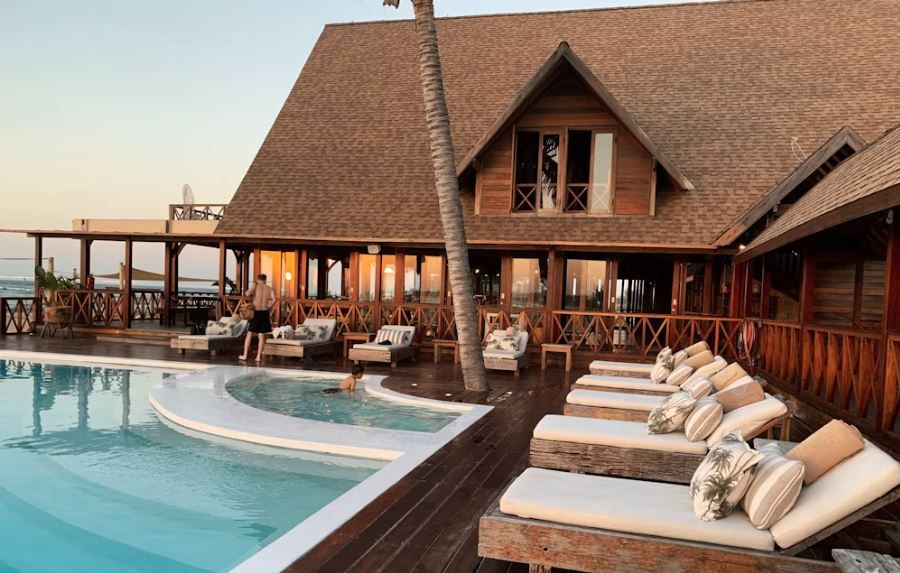

##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **by Bhavnaben M Bhalani**

# **Project Summary -**

This Hotel Booking Analysis EDA delves into understanding cancellation patterns and proposes strategies to minimize cancellations and enhance revenue.

The investigation encompasses booking data from both a city hotel and a resort hotel, including details such as booking dates, length of stay, and guest demographics. The process involves conducting Exploratory Data Analysis (EDA) and visualizations to discern patterns and insights.

Throughout the project, potential measures to mitigate cancellations and boost revenue are explored. For instance, offering early booking discounts, incentives for longer stays, or exclusive perks for direct bookings could be effective strategies.

The EDA process unfolds in three main phases: exploration and inspection of raw data, addressing data impurities by handling null values and removing irrelevant entries, and conducting analyses including univariate, bivariate, and multivariate examinations.

Ultimately, the project emphasizes that by scrutinizing hotel booking data and comprehending cancellation trends, hotels can enact proactive measures to minimize cancellations and optimize revenue streams.

# **GitHub Link -**

# **Problem Statement**


****Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyze the data to discover important factors that govern the bookings.****

#### **Define Your Business Objective?**

Establishing the business objective involves gaining valuable insights into customer booking behavior within the hotel industry. Recognizing that customer demand can vary across different segments, forecasting becomes challenging, potentially necessitating distinct models for each segment. These insights serve to inform hotels in refining their customer strategies and preparing for uncertainties ahead.

# ***Let's Begin !***

**Explore and analyze the data to discover results and statistics**

## ***1. Know Your Data***

### Import Libraries

**Here we have imported the required libraries which will helps us to do different operation to fetch data from dataset properly.**

In [ ]:
# Import Libraries needed in EDA
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive                #Mounting google drive
drive.mount('/content/drive')
hba_df = pd.read_csv('/content/drive/MyDrive/MBB/Project M-2/Hotel Bookings.csv')

### Dataset First View

In [ ]:
# Dataset First Look
print(hba_df.shape)
hba_df

In [ ]:
#Looking first 5 rows of the datset
hba_df.head()

In [ ]:
#Looking the last 5 rows of the dataset
hba_df.tail()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
print(f'Number of rows : {len(hba_df.axes[0])}')
print(f'Number of columns : {len(hba_df.axes[1])}')

### Dataset Information

In [ ]:
# Dataset Info
hba_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
hba_df.duplicated().sum()

In [ ]:
#Dropping the duplicate values
hba_df.drop_duplicates(inplace = True)

In [ ]:
hba_df.shape

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
hba_df.isnull().sum()

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(20,8))
sns.heatmap(hba_df.isna().transpose(),cmap="YlGnBu",cbar_kws={'label': 'Missing Data'})
plt.title('Missing Values', fontsize=12)
plt.show()

### What did you know about your dataset?

We observe that four columns contain missing or null values: company, agent, country, and children.

For the children column, I will substitute null values with 0 under the assumption that the customer did not have any children.

The country column contains null values. I will fill these with 'Others', presuming the customer's country was unspecified during booking.

In the company and agent columns, null values may indicate that customers didn't book the hotel through them. Since these columns contain numeric data, I will replace null values with 0.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
hba_df.columns

In [ ]:
# Dataset Describe
hba_df.describe()

### Variables Description

**Hotel Type:** (Resort Hotel or City Hotel)

**is_canceled:** A binary value indicating whether the booking was canceled (1) or not (0).

**lead_time:** The number of days between the booking entry date into the PMS and the arrival date.

**arrival_date_year:** The year of the arrival date.

**arrival_date_month:** The month of the arrival date.

**arrival_date_week_number:** The week number of the year for the arrival date.

**arrival_date_day_of_month:** The day of the month of the arrival date.

**stays_in_weekend_nights:** The number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel.

**stays_in_week_nights:** The number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel.

**adults:** The number of adults.

**children:** The number of children.

**babies:** The number of babies.

**meal:** The type of meal booked, categorized according to standard hospitality meal packages.

**country:** The country of origin.

**market_segment:** The designation of the market segment. In categories, "TA" represents "Travel Agents," and "TO" represents "Tour Operators."

**distribution_channel:** The booking distribution channel. "TA" stands for "Travel Agents," and "TO" stands for "Tour Operators."

**is_repeated_guest:** A binary value indicating whether the booking name was from a repeated guest (1) or not (0).

**previous_cancellations:** The number of previous bookings canceled by the customer before the current booking.

**previous_bookings_not_canceled:** The number of previous bookings not canceled by the customer before the current booking.

**reserved_room_type:** The code for the reserved room type, presented instead of designation for anonymity reasons.

**assigned_room_type:** The code for the type of room assigned to the booking.

**booking_changes:** The number of changes or amendments made to the booking from the moment it was entered on the PMS until check-in or cancellation.

**deposit_type:** An indication of whether the customer made a deposit to guarantee the booking.

**agent:** The ID of the travel agency that made the booking.

**company:** The ID of the company or entity responsible for making or paying for the booking.

**days_in_waiting_list:** The number of days the booking was on the waiting list before confirmation.

**customer_type:** The type of booking, categorized into four categories.

**adr:** The Average Daily Rate, calculated by dividing the sum of all lodging transactions by the total number of staying nights.

**required_car_parking_spaces:** The number of car parking spaces required by the customer.

**total_of_special_requests:** The number of special requests made by the customer (e.g., twin bed or high floor).

**reservation_status:** The last status of the reservation, categorized into three categories:

    Canceled (booking canceled by the customer),

    Check-Out (customer checked in but already departed), and
    
    No-Show (customer did not check-in and did not inform the hotel of the reason).
    
    reservation_status_date: The date at which the last status was set.

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
pd.Series({col:hba_df[col].unique() for col in hba_df})

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
hba_dfc = hba_df.copy()
hba_dfc.columns

In [ ]:
# replacing null values in children column with 0 assuming that family had 0 children
# replacing null values in company and agent columns with 0 assuming those rooms were booked without company/agent
# replacing null values in country column as 'Others'
hba_dfc['children' ].fillna(0, inplace = True)
hba_dfc['company' ].fillna(0, inplace = True)
hba_dfc['agent' ].fillna(0, inplace = True)
hba_dfc['country'].fillna('Others', inplace = True)
hba_dfc.isnull().sum()

In [ ]:
# dropping the 'company' column as it contains a lot of null values in coparison to other columns
hba_dfc.drop(['company'], axis =1 , inplace = True)        # dropping the values vertically at axis 1 (columns)

In [ ]:
# dropping rows where no adults , children and babies are available because no bookings were made that day
child_guest=hba_dfc[hba_dfc['adults']+hba_dfc['babies']+hba_dfc['children']==0]
hba_dfc.drop(child_guest.index, inplace=True)

In [ ]:
# adding some new columns to make our data analysis ready
hba_dfc['total_people'] = hba_dfc['adults'] + hba_dfc['babies'] + hba_dfc['children']       # creating total people column by adding all the people in that booking

hba_dfc['total_stay'] = hba_dfc['stays_in_weekend_nights'] + hba_dfc['stays_in_week_nights']    # creating a column to check total stay by prople in that booking

In [ ]:
# having a final look to check if our dataset is ready to analyse
hba_dfc.head()

In [ ]:
hba_dfc.tail()

In [ ]:
# checking the final shape of the dataset
print(f' final shape of the dataset is {hba_dfc.shape}')
# checking the unique values which is to be analysed
pd.Series({col:hba_dfc[col].unique() for col in hba_dfc})

#**## What all manipulations have you done and insights you found?**

I began by creating a duplicate of the dataset to preserve the original data integrity. Then, I addressed missing values by replacing them with 0 in the 'children', 'country', and 'agent' columns, as they contained numerical data. In the 'country' column, missing values were substituted with 'Others'. Given that the 'company' column had 96% missing values and didn't contribute significantly to our analysis, I decided to drop it.

Next, I introduced two new columns: 'total_people' and 'total_stay' to facilitate further analysis. In the 'total_people' column, I summed the counts of babies, children, and adults. Similarly, in the 'total_stay' column, I combined the counts from the 'stays_in_weekend_nights' and 'stays_in_week_nights' columns.

Following these manipulations, I examined the modified dataset to ensure its readiness for analysis.

Insights from the manipulated dataset:

1. There are two types of hotels available for booking, allowing analysis of the most preferred type.
2. Guests hail from various countries, indicating diverse origins.
3. Different meal options are offered to guests.
4. Guests can book directly or through various available channels.
5. Booking cancellations occur, and there are also repeat guests.
6. Guests have the option to select their preferred room types during booking.
7. The 'adr' column provides data for analyzing the hotel's revenue performance.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1
type of hotel is most preffered by the guests

In [ ]:
# Count Hotel
hotel_count = hba_dfc.hotel.value_counts()

# Plotting Values in a simple pie chart
hotel_count.plot.pie(figsize=(9,7), autopct='%1.2f%%', shadow=True, fontsize=15,startangle=50)
# Setting the title
plt.title('Hotel Booking Percentage')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

I used Pia chart here because it is used to show the proportions of categorical data, with the size of each piece representing the proportion of each category.

##### 2. What is/are the insight(s) found from the chart?

I found out that guests prefer city Hotel than Resort Hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight is useful for the stakeholder to check which hotel is performing best and they can invest more capitals in that. There is no such negative growth but stakeholders can focus more on City Hotel to get more booking and icrease the overall revenue.

#### Chart - 2

In [ ]:
# Chart - 2 visualization code
# Extracting and storing unique values of hotel cancelation
cancelled_hotel = hba_dfc.is_canceled.value_counts()

# Craeting a pie chart
cancelled_hotel.plot.pie(figsize=(9,7), explode=(0.05,0.05), autopct='%1.2f%%', shadow=True, fontsize=15,startangle=50)

# Giving our pie chart a title
plt.title('Percentage of Hotel Cancellation and Non Cancellation')
plt.axis('equal')
plt.show()

##### 1. Why did you pick the specific chart?

I had to show a part-to-a-whole relationship and percentage of both the values and here pie chart was a good option to show segmented values.

##### 2. What is/are the insight(s) found from the chart?

Here we can see that around 72.48% bookins are not canceled by guests but around 27.52% bookings are canceled by guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

This insight will help stakeholders in comparing the cancellation and non cancellation of bookings. With the help of this insight stakeholders can offer rescheduling the bookings instead of cancellation and set a flexible cancellation policy to reduce booking cancellation.

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

# Counting each meal type
meal_count = hba_dfc.meal.value_counts()

# Extracting each meal type and storing in a variable
meal_name = hba_dfc['meal'].unique()

# Creating a dataset of each meal type and count
meal_df = pd.DataFrame(zip(meal_name,meal_count), columns = ['meal name', 'meal count'])

# Visualising the values on a bar chart
plt.figure(figsize=(15,5))
g = sns.barplot(data=meal_df, x='meal name', y ='meal count')
g.set_xticklabels(meal_df['meal name'])
plt.title('Most preffered meal type', fontsize=20)
plt.show()

Meal type variable description:

BB - Bed and Breakfast

HB- Half Board

FB- Full Board

SC- Self Catering

##### 1. Why did you pick the specific chart?

There were 4 values to compare and Bar graphs are used to compare things between different groups that is why I used this chart.

##### 2. What is/are the insight(s) found from the chart?

After visualizing the above chart we can see that BB - (Bed and Breakfast) is the most preffered meal type by guests.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from the gained insight above now stakeholders know that BB(Bed and Breakfast) is most preferred meal type so they can arrange raw material for this meal in advance and deliver the meal without any delay.

#### Chart - 4

In [ ]:
# Chart - 4 visualization code
# Plotting with countplot
plt.figure(figsize=(10,4))
sns.countplot(x=hba_dfc['arrival_date_year'],hue=hba_dfc['hotel'])
plt.title("Number of bookings across year", fontsize = 25)
plt.show()

##### 1. Why did you pick the specific chart?

Bar graphs are used to compare things between different groups that is why I used this chart.

##### 2. What is/are the insight(s) found from the chart?

From above insight I found out that hotel was booked most times in year 2016.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Above insight shows that number of booking was declined after year 2016. Stakeholders can now what went wrong after 2016 and fix that problem to increase the number of bookings. One way to do this is ask for feedbacks from guests and have a meeting with old employees who else were serving int the year 2016.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(15,5))
sns.countplot(x=hba_dfc['arrival_date_month'],hue=hba_dfc['hotel'])
plt.title("Number of booking across months", fontsize = 20)
plt.show()

##### 1. Why did you pick the specific chart?

I had to compare values across the months and for that bar chart was one of the best choice.

##### 2. What is/are the insight(s) found from the chart?

Above insight shows that August and July ware 2 most busy months in compare to others.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is negative insight but hotel can use this insight to arrange everything in advance and welcome their guest in the best way possible and hotel can also run some promotional offer in these 2 months to attract more guests.

#### Chart - 6

In [ ]:
# Chart - 6 visualization code
# Coounting number of guests from various countries and changing column names
country_df = hba_dfc['country'].value_counts().reset_index()[:10]

# Visualising the values on a bar chart
# setting the graph size
plt.figure(figsize=(15,4))
sns.barplot(x=country_df['country'], y=country_df['count'])
plt.title('Number of guests from each country', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

Here I comapred different values that's why I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart I found out that most guests come from PRT(Portugal).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no negative insight. After knowing that most of the guests come from Portugal Hotels can add more Portugal cousines in their menu to make guests order more food.

#### Chart - 7 Which room type is most preffered by guests?

In [ ]:
# Chart - 7 visualization code
# Setting the figure size
plt.figure(figsize=(15,5))

# Plotting the values in chart
sns.countplot(x=hba_dfc['reserved_room_type'],order=hba_dfc['reserved_room_type'].value_counts().index)

# Setting the title
plt.title('Preffered Room Type by Guests', fontsize = 20)

# Show the chart
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent. It is often used to compare between values of different categories in the data.

##### 2. What is/are the insight(s) found from the chart?

By observing the above chart we can understand that the room type A most preffered ( almost 55,000) by the guests while booking the hotel.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

As it is clear that room type A is most used hotel should increase the number of A type room to maximize the revenue.

#### Chart - 8 Which Market Segment has the most booking?

In [ ]:
# Chart - 8 visualization code
plt.figure(figsize=(15,5))
sns.countplot(x=hba_dfc['market_segment'], order = hba_dfc['market_segment'].value_counts().index)
plt.title('Market segment share in booking', fontsize=20)
plt.show()

##### 1. Why did you pick the specific chart?

A bar plot shows catergorical data as rectangular bars with the height of bars proportional to the value they represent.

##### 2. What is/are the insight(s) found from the chart?

Above insight shows that Online Travel Agent has the most bookings.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is no negative growth. Hotel should come up with some great idea to increase share among other market segments to increase the revenue.

# **Bivariate and Multivariate Analysis**

#### Chart - 9 How long people stay in the hotel?

In [ ]:
# Chart - 9 visualization code
# Creating a not cancelled dataframe
not_cancelled_df = hba_dfc[hba_dfc['is_canceled'] == 0]
# Creating a hotel stay dataframe
hotel_stay = not_cancelled_df[not_cancelled_df['total_stay'] <= 15]  #Visualizing pattern till 15days stay


# Setting plot size and plotting barchart
plt.figure(figsize = (15,5))
sns.countplot(x = hotel_stay['total_stay'], hue = hotel_stay['hotel'])

# Adding the label of the chart
plt.title('Total number of stays in each hotel',fontsize = 20)
plt.xlabel('Total stay')
plt.ylabel("Count of days")
plt.show()

From the above chart we can see that in City hotel most people stay for 3 days and in Resort hotel most people stay for only 1 day.

Hotel should work on to increase total stay in Resort hotel to increase revenue.

#### Chart - 10 Which hotel makes most revenue?

In [ ]:
# Chart - 10 visualization code
# Counting the revnue for each hotel type using groupby function
most_rev = hba_dfc.groupby('hotel')['adr'].count()

# Plotting the values in a pie chart
most_rev.plot.pie(autopct='%1.2f%%', figsize=(15,5))

# Setting the title
plt.title('Percentage of daily revenue by each hotel type', fontsize=20)
plt.axis('equal')

# Show the chart
plt.show()

From the above insight it is clear that City hotel has more share in revenue generation over Resort Hotel.

Stake holderscould improve the service of Resort hotel so that people stay more in resort hotel and increase the revenue.

#### Chart - 11 Hotel with most repeated guests.

In [ ]:
# Chart - 11 visualization code
# Grouping hotel types on repeated guests
rep_guest = hba_dfc[hba_dfc['is_repeated_guest']==1].groupby('hotel').size().reset_index()

# Renaming the column
rep_guest = rep_guest.rename(columns={0:'number_of_repated_guests'})

# Setting the chart size
plt.figure(figsize=(8,4))

# Plotting the values in a bar chart
sns.barplot(x=rep_guest['hotel'],y=rep_guest['number_of_repated_guests'])

# Setting the labels and title
plt.xlabel('Hotel type', fontsize=12)
plt.ylabel('count of repeated guests', fontsize=12)
plt.title('Most repeated guests for each hotel', fontsize=20)

# Show Chart
plt.show()

We can see that Resort Hotel has slightly more repeated guests over City Hotel this could be because of less waiting time in Resort Hotel and better service there because of less rush.

#### Chart - 12 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
# Setting the chart size
plt.figure(figsize=(15,10))

# Creating heatmap to see correlation of each columns
sns.heatmap(hba_dfc.corr(numeric_only=True),annot=True)          # Setting the numeric only colun to True to avoid warning

# Setting the title
plt.title('Correlation of the columns', fontsize=20)

# Show heatmap
plt.show()

##### 1. Why did you pick the specific chart?

Correlation heatmaps was used to find potential relationships between variables and to understand the strength of these relationships.

##### 2. What is/are the insight(s) found from the chart?

1) lead_time and total_stay is positively corelated. that means if customers stay more then the lead time increases.

2)adults,childrens and babies are corelated to each other. That means more the people more will be adr.

3) is_repeated guest and previous bookings not canceled has strong corelation. That means repeated guests don't cancel their bookings.**

#### Chart - 13 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(hba_dfc)
plt.show()

##### 1. Why did you pick the specific chart?

A pairs plot provides insights into both the distribution of individual variables and the correlations between pairs of variables.

The chart illustrates the relationships among all columns.

Observing the pairs plot, it's apparent that as cancellations rise, the total length of stay decreases. Additionally, there's a positive correlation between the total number of people and the average daily rate (ADR), indicating a direct relationship between these variables.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.



1. **Cancellation Rate Insights:**
   - About 27.52% of bookings end in cancellations, presenting an opportunity for loyalty discounts to encourage booking retention.

2. **Meal Preparation Efficiency:**
   - Given that Bed and Breakfast (BB) meals are the most favored, hotels should ensure advanced stocking of raw materials to prevent delays.

3. **Room Availability Optimization:**
   - To reduce waiting times, there should be an increase in the number of rooms available in City Hotels.

4. **Targeted Marketing Strategies:**
   - Travel Agencies (TA) account for the majority of bookings, suggesting the need for promotional offers to attract bookings from other market segments.

5. **Room Type Preferences:**
   - Room Type A is the most preferred by guests, indicating a need for an increase in its availability.

6. **Improving Guest Retention:**
   - The low rate of repeated guests suggests areas for improvement to enhance guest experiences and encourage repeat visits.

7. **Operational Efficiency:**
   - City hotels experience longer waiting times compared to resort hotels, highlighting the need for operational adjustments to meet demand efficiently.

8. **Optimizing Stay Duration:**
   - Stays in both hotel types typically last less than seven days, suggesting opportunities to enhance guest experiences within shorter time frames.

9. **Targeted Demographic Focus:**
    - The majority of guests originate from Portugal, emphasizing the importance of targeted marketing and service strategies tailored to this demographic.

# **Conclusion**

To meet business goals effectively, I recommend implementing dynamic pricing strategies alongside introducing enticing offers and packages to entice potential customers. Additionally, to foster customer loyalty and encourage repeat business, launching a loyalty points program that allows customers to redeem points towards future bookings would be beneficial. Furthermore, enhancing amenities such as parking facilities, dedicated kids' corners, and complimentary internet access can significantly boost booking numbers and enhance overall guest satisfaction.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***